In [1]:
import h5py
import galaxychop as gchop
import uttr
import attr
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Read Galaxy

In [2]:
gal = gchop.read_hdf5("../galaxy-chop/tests/datasets/gal394242.h5")

In [3]:
galc = gchop.center(gal)
gal = gchop.star_align(gchop.center(gal))

In [4]:
gal.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,-0.046034,-0.062107,-0.262805,6.361882,22.510609,-5.777990,0.0,-195699.620206,290.293111,-195409.327095,6.274752,-1.937919,-0.641142
1,stars,0,9.745897e+05,-0.155805,-0.125851,-0.183509,21.987537,8.126586,0.269497,0.0,-196176.962277,274.782915,-195902.179362,1.457382,-3.992913,1.500995
2,stars,0,6.935776e+05,-0.250356,-0.162933,-0.206296,-9.980948,7.310578,15.308016,0.0,-195152.120168,193.699612,-194958.420557,-0.986047,5.891477,-3.456476
3,stars,0,1.070959e+06,-0.224013,-0.253282,-0.378345,-9.688713,-5.382400,-1.176774,0.0,-194695.767625,62.113089,-194633.654536,-1.738349,3.402066,-1.248255
4,stars,0,6.013803e+05,-0.068259,-0.198563,-0.285501,17.201766,7.986760,-16.388029,0.0,-195703.942688,314.128285,-195389.814402,5.534291,-6.029758,2.870471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272642,gas,2,1.429845e+06,-78.378459,293.283941,-179.516895,-109.840458,-39.368461,-128.225253,0.0,-17314.963254,15028.258726,-2286.704528,-44673.711515,9668.120109,35300.081655
272643,gas,2,1.436841e+06,-149.482080,172.000922,-168.548138,-92.216639,-27.622935,-35.225617,0.0,-20910.620132,5253.889589,-15656.730543,-10714.632746,10277.344409,19990.480721
272644,gas,2,1.690580e+06,-109.441370,279.282145,-182.645706,-111.512559,-76.055734,-101.135542,0.0,-17358.735183,14223.961789,-3134.773394,-42136.604564,9298.877795,39467.110604
272645,gas,2,1.210975e+06,-158.664268,-87.290989,155.675557,-76.805128,28.905652,70.613063,0.0,-23427.833806,5860.384564,-17567.449242,-10663.787614,-752.911013,-11290.689705


## [ Scatter ] 

## Stars

Text(0, 0.5, 'Z [Kpc]')

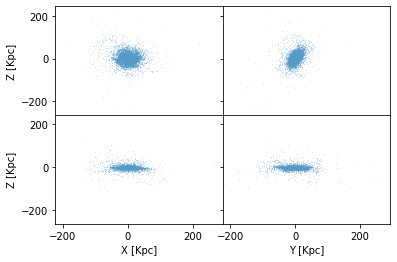

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(wspace=0, hspace=0)
ax1 = galc.plot.scatter("x","z", alpha=.5, s=0.5, ptypes=['stars'], ax=ax1)
ax2 = galc.plot.scatter("y","z", alpha=.5, s=0.5, ptypes=['stars'], ax=ax2)
ax3 = gal.plot.scatter("x","z", alpha=.5, s=0.5, ptypes=['stars'],  ax=ax3)
ax4 = gal.plot.scatter("y","z", alpha=.5, s=0.5, ptypes=['stars'],  ax=ax4)
#legend=False,
ax4.set_xlabel('Y [Kpc]')
ax3.set_xlabel('X [Kpc]')
ax3.set_ylabel('Z [Kpc]')
ax1.set_ylabel('Z [Kpc]')

#plt.savefig('gchop_plots/pos_plane_stars.png', dpi=100)

Text(0.5, 1.0, 'Centred & Aligned')

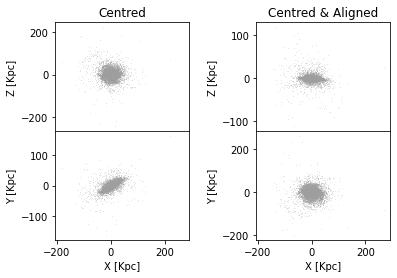

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True,) # sharey=True)
fig.subplots_adjust(wspace=0.5, hspace=0)

#left
ax1 = galc.plot.scatter("x","z", alpha=.5, s=0.5, ptypes=['stars'], color='grey', ax=ax1)
ax3 = galc.plot.scatter("x","y", alpha=.5, s=0.5, ptypes=['stars'], color='grey', ax=ax3)
#right
ax2 = gal.plot.scatter("x","z", alpha=.5, s=0.5, ptypes=['stars'], color='grey',  ax=ax2)
ax4 = gal.plot.scatter("x","y", alpha=.5, s=0.5, ptypes=['stars'], color='grey',  ax=ax4)
#legend=False,
ax4.set_xlabel('X [Kpc]')
ax3.set_xlabel('X [Kpc]')
ax3.set_ylabel('Y [Kpc]')
ax4.set_ylabel('Y [Kpc]')
ax1.set_ylabel('Z [Kpc]')
ax2.set_ylabel('Z [Kpc]')

ax1.set_title('Centred')
ax2.set_title('Centred & Aligned')

#plt.savefig('gchop_plots/pos_plane_stars2.png', dpi=100)

## All particels

Text(0, 0.5, 'Z [Kpc]')

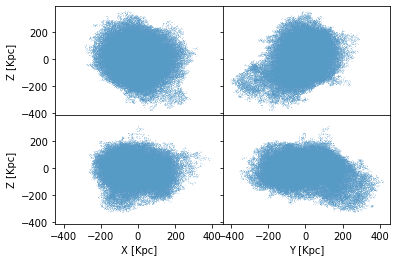

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(wspace=0, hspace=0)
ax1 = galc.plot.scatter("x","z", alpha=.5, s=0.5, ax=ax1)
ax2 = galc.plot.scatter("y","z", alpha=.5, s=0.5, ax=ax2)
ax3 = gal.plot.scatter("x","z", alpha=.5, s=0.5,  ax=ax3)
ax4 = gal.plot.scatter("y","z", alpha=.5, s=0.5,  ax=ax4)
#legend=False,
ax4.set_xlabel('Y [Kpc]')
ax3.set_xlabel('X [Kpc]')
ax3.set_ylabel('Z [Kpc]')
ax1.set_ylabel('Z [Kpc]')

#plt.savefig('gchop_plots/pos_plane.png', dpi=100)

## [ PairPlots ]

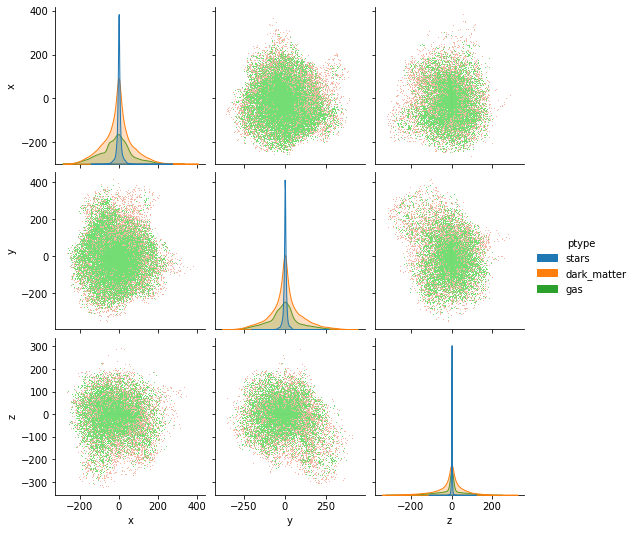

In [8]:
gal.plot.pairplot()

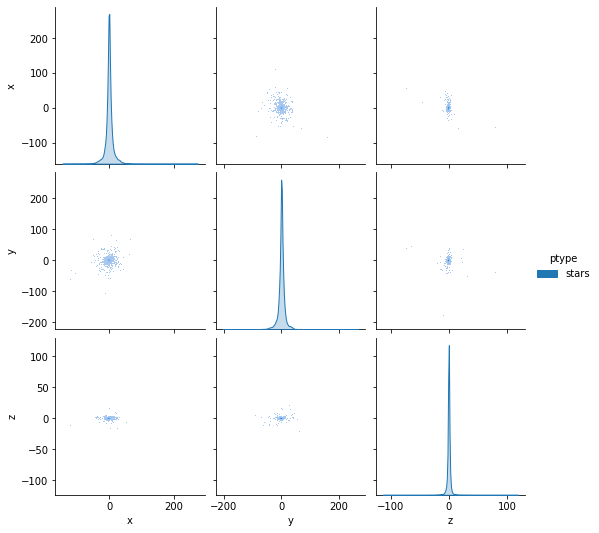

In [9]:
gal.plot.pairplot(labels='ptype', ptypes=['stars'])

## [KDE]

<AxesSubplot:xlabel='x', ylabel='y'>

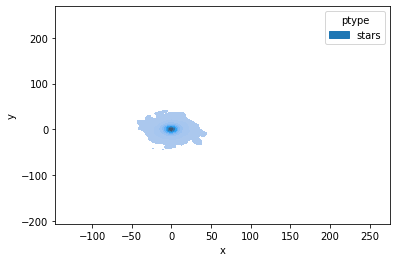

In [10]:
gal.plot.kde("x", "y", labels='ptype', ptypes=['stars'], fill=True)

<AxesSubplot:xlabel='x', ylabel='y'>

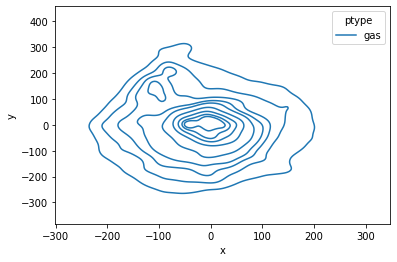

In [11]:
gal.plot.kde("x", "y", labels='ptype', ptypes=['gas'])

<AxesSubplot:xlabel='x', ylabel='y'>

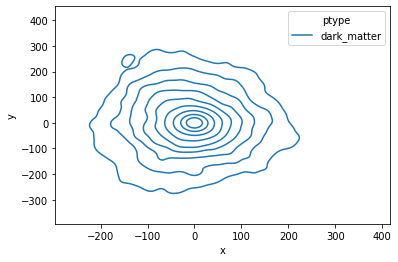

In [12]:
gal.plot.kde("x", "y", labels='ptype', ptypes=['dark_matter'])

## [ Hist ]

<AxesSubplot:xlabel='x', ylabel='y'>

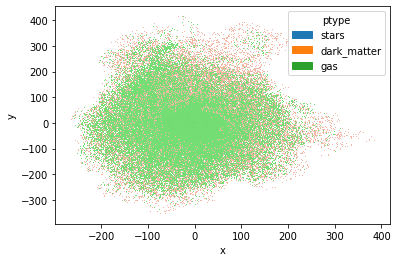

In [13]:
gal.plot.hist("x","y", labels='ptype')

<AxesSubplot:xlabel='x', ylabel='y'>

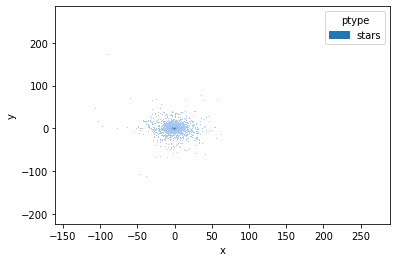

In [14]:
gal.plot.hist("x", "y", labels='ptype', ptypes=['stars'])

# Read model labels

In [15]:
#df = pd.read_pickle('df_stars.pkl')
df = pd.read_pickle('df_stars_gal394242_rvir.pkl')

In [16]:
df

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,...,lab_th,lab_ab,lab_cr,lab_km,lab_km3,lab_km4,lab_gmm,lab_gmm3,lab_gmm4,lab_agmm
0,stars,0,5.224283e+05,-0.053393,-0.063512,-0.261071,6.017590,22.533272,-6.051982,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,stars,0,9.745897e+05,-0.160266,-0.127742,-0.178286,21.924235,8.289647,-0.418943,0.0,...,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0
2,stars,0,6.935776e+05,-0.255175,-0.165614,-0.198094,-9.574002,7.298885,15.571255,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,stars,0,1.070959e+06,-0.233303,-0.256464,-0.370506,-9.678900,-5.458488,-0.866013,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,stars,0,6.013803e+05,-0.075262,-0.200221,-0.282568,16.644463,8.046805,-16.925347,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37388,stars,0,9.867470e+05,135.738559,-160.160626,-15.369098,-56.741920,57.947940,121.877589,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
37389,stars,0,8.290853e+05,14.748290,15.584324,-5.206648,-6.194351,263.651947,313.783409,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
37390,stars,0,1.004103e+06,16.885028,56.265101,-2.875864,-43.605196,304.321445,11.364916,0.0,...,0.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0
37391,stars,0,1.526682e+06,270.481924,-80.307674,15.246717,-89.287180,-51.203767,-23.223115,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0


<AxesSubplot:xlabel='x', ylabel='y'>

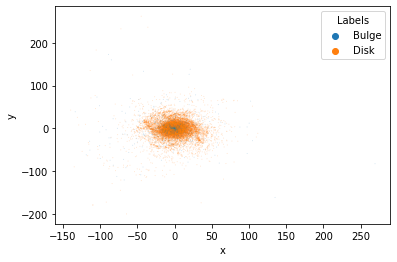

In [17]:
gal.plot.scatter("x", "y", marker='.', linewidth=0, s=4, alpha=0.2, 
                 ptypes=['stars'], labels = df.lab_ab, lmap={0: 'Bulge', 1: 'Disk'})

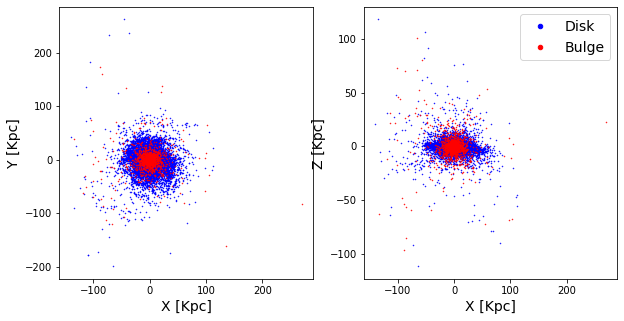

In [18]:
xx = gal.stars.x.value
yy = gal.stars.y.value
zz = gal.stars.z.value
labels_ab = df.lab_ab
mask_b = np.where(labels_ab == 0)[0]
mask_d = np.where(labels_ab == 1)[0]

fig, ax = plt.subplots(1,2, figsize=[10, 5])

ax[0].plot(xx[mask_d], yy[mask_d], '.', color='blue', ms=1, label='Disk')
ax[0].plot(xx[mask_b], yy[mask_b], '.', color='red', ms=1, label='Bulge')
ax[0].set_xlabel('X [Kpc]', fontsize=14)
ax[0].set_ylabel('Y [Kpc]', fontsize=14)


ax[1].plot(xx[mask_d], zz[mask_d], '.', color='blue', ms=1, label='Disk')
ax[1].plot(xx[mask_b], zz[mask_b], '.', color='red', ms=1, label='Bulge')
ax[1].set_xlabel('X [Kpc]', fontsize=14)
ax[1].set_ylabel('Z [Kpc]', fontsize=14)

ax[1].legend(markerscale=9., fontsize=14)
#plt.savefig('gchop_plots/xyz_lab_ab.png', dpi=100)

In [19]:
np.shape(mask_d)+np.shape(mask_b)

(31427, 5856)